#### Instructions
###### Follow the instructions given in comments prefixed with ## and write your code below that.
###### Also fill the partial code in given blanks. 
###### Don't make any changes to the rest part of the codes

### Answer the questions given at the end of this notebook within your report.

### You would need to submit your GitHub repository link. Refer to the PDF document for the instructions and details.





In [1]:
## import cv2
## import numpy
## import matplotlib pyplot
## import KMeans cluster from sklearn
## import distance from scipy.spatial
from matplotlib.offsetbox import OffsetImage, AnnotationBbox
import cv2
import numpy as np
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from scipy.spatial import distance

In [2]:
## Reading the image plaksha_Faculty.jpg
f = cv2.imread("Plaksha_Faculty.jpg")
  
## Convert the image to grayscale
gray_f = cv2.cvtColor(f,cv2.COLOR_BGR2GRAY)
  
# Loading the required haar-cascade xml classifier file
face_cascade = cv2.CascadeClassifier(cv2.data.haarcascades + 'haarcascade_frontalface_default.xml')
  
# Applying the face detection method on the grayscale image. 
## Change the parameters for better detection of faces in your case.
faces_rect = face_cascade.detectMultiScale(gray_f, 1.05, 4, minSize=(25,25), maxSize=(50,50))
 
# Define the text and font parameters
text = "face" ## The text you want to write
font = cv2.FONT_HERSHEY_COMPLEX  ## Font type
font_scale = 0.5  ## Font scale factor
font_color = (0, 0, 255)  ## Text color in BGR format (here, it's red)
font_thickness = 1  ## Thickness of the text

  
# Iterating through rectangles of detected faces
for (x, y, w, h) in faces_rect:
    cv2.rectangle(f, (x, y), (x+w, y+h), (0, 0, 255), 2)
    # Use cv2.putText to add the text to the image, Use text, font, font_scale, font_color, font_thickness here
    cv2.putText(f, text, (x, y-10), font, font_scale, font_color, font_thickness)
    
## Display the image and window title should be "Total number of face detected are #"  
cv2.imshow("Total number of face detected are " + str(len(faces_rect)), f)
cv2.waitKey(0)
cv2.destroyAllWindows()

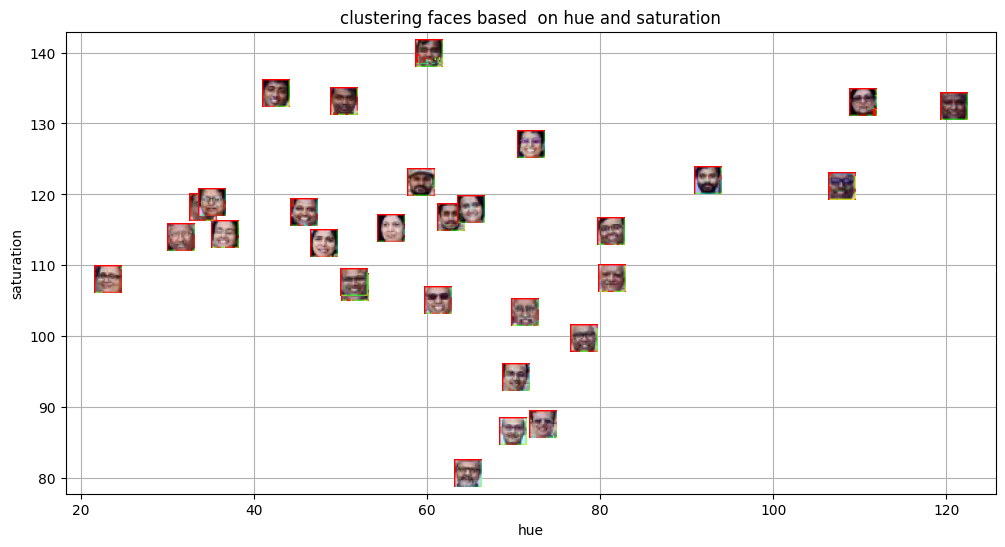

In [8]:
from matplotlib.offsetbox import OffsetImage, AnnotationBbox
# Extract face region features (Hue and Saturation)
img_hsv = cv2.cvtColor(f, cv2.COLOR_BGR2HSV)  ## call the img and convert it from BGR to HSV and store in img_hsv
hue_saturation = []
face_images = []  # To store detected face images

for (x, y, w, h) in faces_rect:
    face = img_hsv[y:y + h, x:x + w]
    hue = np.mean(face[:, :, 0])
    saturation = np.mean(face[:, :, 1])
    hue_saturation.append((hue, saturation))
    face_images.append(face)

hue_saturation = np.array(hue_saturation)

## Perform k-Means clustering on hue_saturation and store in kmeans
kmeans = KMeans(n_clusters=2, random_state=0, n_init=10).fit(hue_saturation)
#centroids = kmeans.cluster_centers_
#labels = kmeans.labels_

# Create a figure and axis
fig, ax = plt.subplots(figsize=(12, 6))

# Plot the clustered faces with custom markers
for i, (x,y,w,h ) in enumerate(faces_rect):
    im = OffsetImage(cv2.cvtColor(cv2.resize(face_images[i], (20, 20)), cv2.COLOR_HSV2RGB))
    ab = AnnotationBbox(im, (hue_saturation[i, 0], hue_saturation[i, 1]), frameon=False, pad=0)
    ax.add_artist(ab)
    plt.plot(hue_saturation[i, 0], hue_saturation[i, 1])
    

## Put x label
plt.xlabel('hue')
## Put y label
plt.ylabel('saturation')
## Put title
plt.title('clustering faces based  on hue and saturation')
## Put grid
plt.grid()
## show the plot
plt.show()

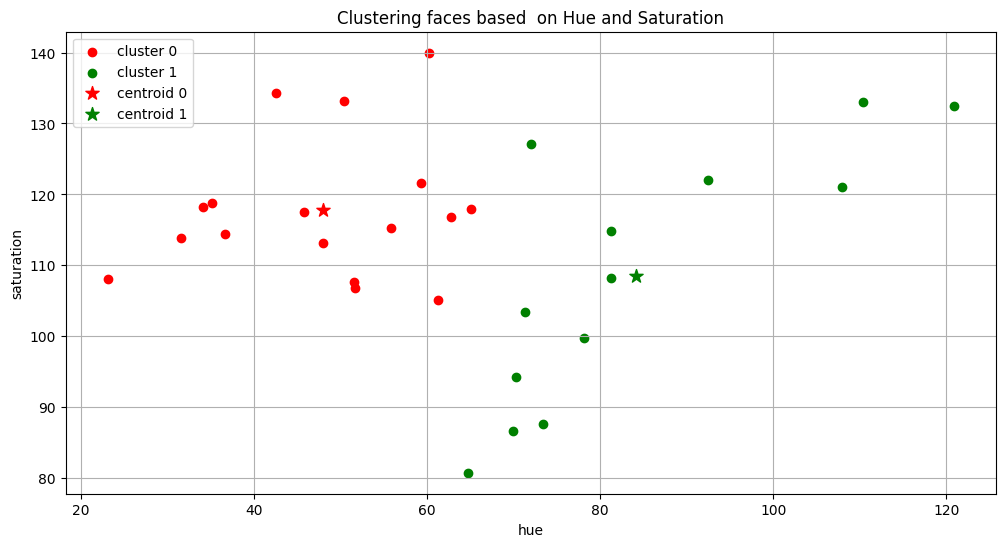

In [9]:
# Create an empty list to store legend labels
legend_labels = []

# Create lists to store points for each cluster
cluster_0_points = []
cluster_1_points = []

# Your code for scatter plot goes here
fig, ax = plt.subplots(figsize=(12, 6))
for i, (x, y, w, h) in enumerate(faces_rect):
    if kmeans.labels_[i] == 0:
        cluster_0_points.append((hue_saturation[i, 0], hue_saturation[i, 1]))
    else:
        cluster_1_points.append((hue_saturation[i, 0], hue_saturation[i, 1]))


cluster_0_points = np.array(cluster_0_points)
# Plot points for cluster 0 in green
plt.scatter(cluster_0_points[:,0], cluster_0_points[:,1], color = 'r', marker = 'o', label = 'cluster 0')


cluster_1_points = np.array(cluster_1_points)
# Plot points for cluster 1 in blue
plt.scatter(cluster_1_points[:,0], cluster_1_points[:,1],color = 'g',marker = 'o', label = "cluster 1")

# Calculate and plot centroids
centroid_0 = kmeans.cluster_centers_[0]
centroid_1 = kmeans.cluster_centers_[1]

# Plot both the centroid for cluster 0 and cluster 1 
plt.scatter(centroid_0[0],  centroid_0[1], color='r',marker='*',s= 100  ,label= 'centroid 0')
plt.scatter(centroid_1[0],centroid_1[1], color='g',marker='*',s= 100, label='centroid 1')

## Put x label
## Put y label
## Put title
## Add a legend
## Add grid
## Show the plot
plt.xlabel('hue')
plt.ylabel('saturation')
plt.title('Clustering faces based  on Hue and Saturation')
plt.legend()
plt.grid()
plt.show()


In [12]:
## Read the class of the template image 'Dr_Shashi_Tharoor.jpg' using cv2 and store it in template_img
template_img = cv2.imread('Dr_Shashi_Tharoor.jpg')
# Detect face  in the template image after converting it to gray and store it in template_faces
template_gray = cv2.cvtColor(template_img, cv2.COLOR_BGR2GRAY)
template_faces = face_cascade.detectMultiScale(template_gray, 1.1, 5, minSize=(30,30))
# Draw rectangles around the detected faces
for (x, y, w, h) in template_faces:
    cv2.rectangle(template_img, (x, y), (x + w, y + h), (0, 255, 0), 3)
cv2.imshow("Template image with detected face", template_img)
cv2.waitKey(0)
cv2.destroyAllWindows()      

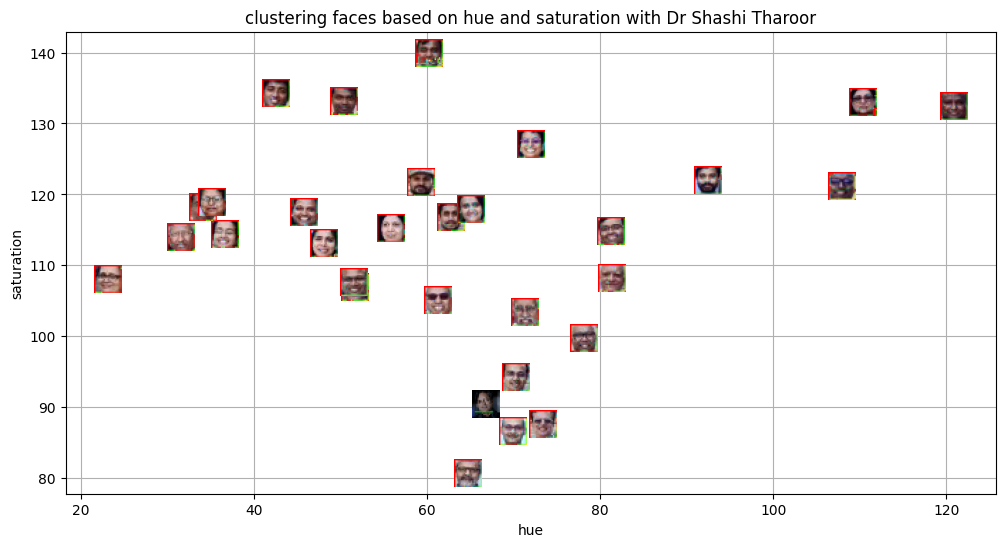

In [10]:
# Convert the template image to HSV color space and store it in template_hsv
template_hsv = cv2.cvtColor(template_img,cv2.COLOR_BGR2HSV)

# Extract hue and saturation features from the template image as we did it for detected faces.
template_hue = np.mean(template_hsv[:, :, 0])
template_saturation = np.mean(template_hsv[:, :, 1])

# Predict the cluster label for the template image and store it in template_label
template_label = kmeans.predict([[template_hue,template_saturation]])[0]

# Create a figure and axis for visualization
fig, ax = plt.subplots(figsize=(12, 6))

# Plot the clustered faces with custom markers (similar to previous code)
for i, (x, y, w, h) in enumerate(faces_rect):
    color = 'red' if kmeans.labels_[i] == 0 else 'blue'
    im = OffsetImage(cv2.cvtColor(cv2.resize(face_images[i], (20, 20)), cv2.COLOR_HSV2RGB))
    ab = AnnotationBbox(im, (hue_saturation[i, 0], hue_saturation[i, 1]), frameon=False, pad=0)
    ax.add_artist(ab)
    plt.plot(hue_saturation[i, 0], hue_saturation[i, 1], 'o', markersize=5, color=color)

# Plot the template image in the respective cluster
if template_label == 0:
    color = 'red'
else:
    color = 'blue'
im = OffsetImage(cv2.cvtColor(cv2.resize(template_img, (20, 20)), cv2.COLOR_BGR2RGB))
ab = AnnotationBbox(im, (template_hue, template_saturation), frameon=False, pad=0)
ax.add_artist(ab)

## Put x label
## Put y label
## Put title
## Add grid
## show plot
plt.xlabel('hue')
plt.ylabel('saturation')
plt.title('clustering faces based on hue and saturation with Dr Shashi Tharoor')
plt.grid()
plt.show()

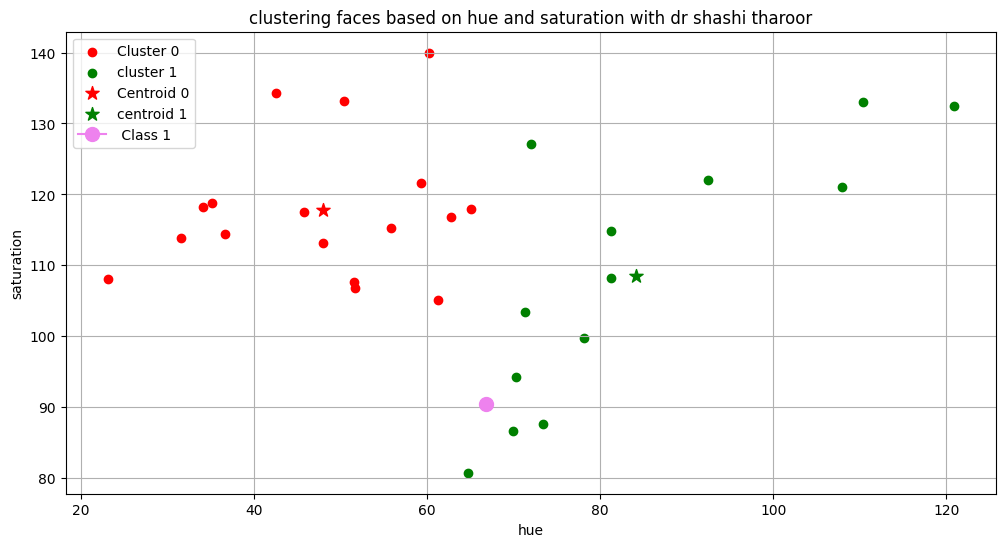

In [11]:
# Create an empty list to store legend labels
legend_labels = []

# Create lists to store points for each cluster
cluster_0_points = []
cluster_1_points = []

# Your code for scatter plot goes here
fig, ax = plt.subplots(figsize=(12, 6))
for i, (x, y, w, h) in enumerate(faces_rect):
    if kmeans.labels_[i] == 0:
        cluster_0_points.append((hue_saturation[i, 0], hue_saturation[i, 1]))
    else:
        cluster_1_points.append((hue_saturation[i, 0], hue_saturation[i, 1]))

# Plot points for cluster 0 in green
cluster_0_points = np.array(cluster_0_points)
plt.scatter(cluster_0_points[:,0],cluster_0_points[:,1],color='r',marker='o',label='Cluster 0')

# Plot points for cluster 1 in blue
cluster_1_points = np.array(cluster_1_points)
plt.scatter(cluster_1_points[:,0], cluster_1_points[:,1], color='g',label='cluster 1',marker='o')

# Calculate and plot centroids for both the clusters
centroid_0 = kmeans.cluster_centers_[0]
centroid_1 = kmeans.cluster_centers_[1]
plt.scatter(centroid_0[0],centroid_0[1],color='r',marker='*', s=100, label='Centroid 0')
plt.scatter(centroid_1[0] , centroid_1[1],color = 'g',marker='*', s= 100,label='centroid 1')  ## plot for centroid 1
plt.plot(template_hue, template_saturation, marker='o', c= 'violet',markersize= 10, label=' Class 1' )

## Put x label
## Put y label
## Put title
## Add a legend
## Add grid
## show the plot
plt.xlabel('hue')
plt.ylabel('saturation')
plt.title('clustering faces based on hue and saturation with dr shashi tharoor')
plt.grid()
plt.legend()
plt.show()
                                            ## End of the lab 5 ##

## Report:
## Answer the following questions within your report:


#### 1. What are the common distance metrics used in distance-based classification algorithms? 

Ans: Common distance metrics that are used in distance based classification algorithms are:

     1) Mahalonobis distance
     2) Euclidean distance
     3) Manhattan distance or chandigarh distance
     4) chebyshev distance
     5) Minkowski distance
     6) cosine distance

#### 2. What are some real-world applications of distance-based classification algorithms? 

Ans : Some real world applications of distance based classification algorithms are : 

      1) Medical diagnosis
      2) Face recognition
      3) customer segmentation 
      4) Fraud detection 

#### 3. Explain various distance metrics. 

Ans : 
      
      1) Euclidean distance : straight line distance d^2 = (x1-x2)^2 + (y1-y2)^2
      2) Manhattan distance : (|x1-x2|+|y1-y2|)
      3) Diagonal distance : max(|x1-x2|,|y1-y2|)
      4) cosine distance  :  |A||B|/A.B
      5) Mahanolobis distance : accounts the correlation between the features
#### 4. What is the role of cross validation in model performance? 

Ans : The role of cross validation in model performance :

     1) Helps in performance estimation
     2) Helps in detecting overfitting 
     3) Multiple folds helps in reducing variance

#### 5. Explain variance and bias in terms of KNN? 

Ans : Bias : using larger  k values leading to smoother and simple decision boundaries. So model fails to detect patterns. Hence high bias means underfitting

      Variance : When k is small the model becomes very sensitive to noise. Hence low bias means high variance which means overfitting.